In [10]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [38]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
    raw = np.asarray(img_float)
    factor= (max_desired-min_desired)/(max_val-min_val)
    img_out = (img_float-min_val)*factor+min_desired
    

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)
def gamma_map(img_in, gamma):
    img_float = img_as_float(img_in)
    img_out = np.power(img_float,gamma)
    return img_as_ubyte(img_out)
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    mask = im_org > thres
    return(mask)
def sign_threshold(img_org):
    """
    Apply a threshold for  DTUSigns2.jpg (a color image) and return the resulting image
    :param img_in: Input image
    :param thres: char of what color you want filtered 'r' or 'b'
    :return: Resulting image (color) where background
    """
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    return segm_blue


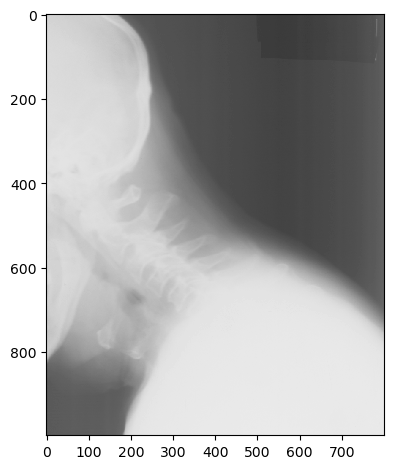

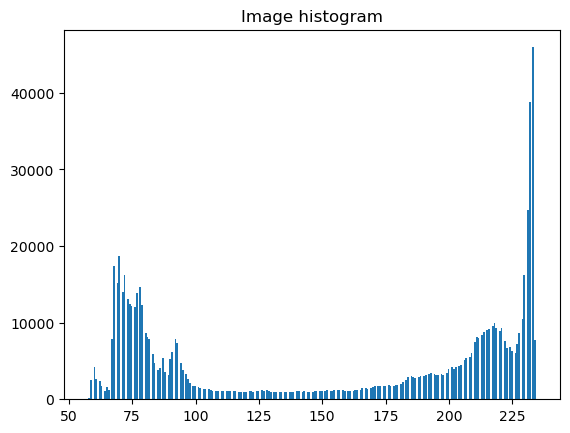

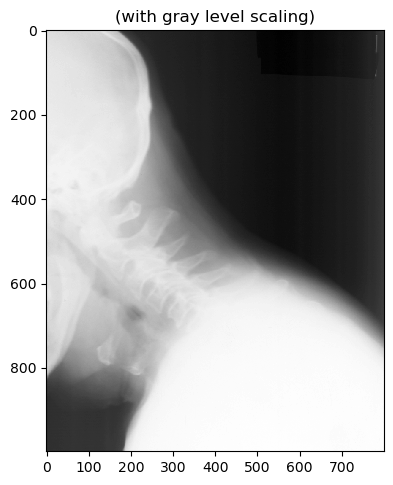

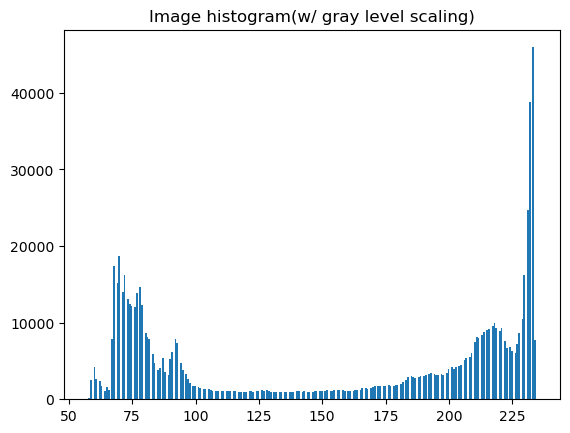

Max in byte: 235
Min in byte: 57
Max in float: 0.9215686274509803
Min in float: 0.22352941176470587
Max in ub: 235
Min in ub: 57


In [15]:
in_dir = "/Users/jordan/Documents/GitHub/DTUImageAnalysis/exercises/ex3-PixelwiseOperations/data/"
im_name = "vertebra.png"
im_org = io.imread(in_dir + im_name)
#show img
io.imshow(im_org)
io.show()
#histogram
h=plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()
#Do Grayscaling
raw = np.asarray(im_org)
maximum = np.max(raw)
minimum = np.min(raw)
io.imshow(im_org, vmin=minimum, vmax=maximum)
plt.title('(with gray level scaling)')
io.show()
#histogram of grayscaled img
h=plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram(w/ gray level scaling)')
io.show()
#Print byte max and min
print(f"Max in byte: {maximum}")
print(f"Min in byte: {minimum}")
#convert to float and show min and max
im_float = img_as_float(im_org)
raw_float = np.asarray(im_float)
maximum_fl = np.max(raw_float)
minimum_fl = np.min(raw_float)
print(f"Max in float: {maximum_fl}")
print(f"Min in float: {minimum_fl}")
#same thing in ubyte
im_ubyte = img_as_ubyte(im_float)
raw_ub = np.asarray(im_ubyte)
maximum_ub = np.max(raw_ub)
minimum_ub = np.min(raw_ub)
print(f"Max in ub: {maximum_ub}")
print(f"Min in ub: {minimum_ub}")




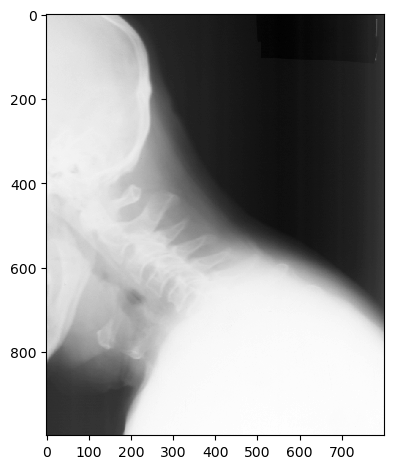

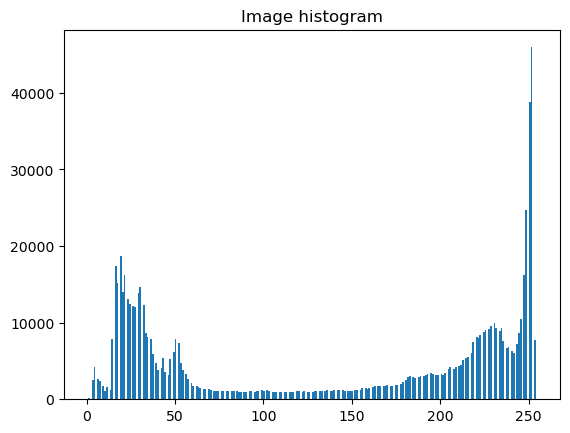

In [19]:
stretch_img= histogram_stretch(im_org)
#show img
io.imshow(stretch_img)
io.show()
#histogram
h=plt.hist(stretch_img.ravel(), bins=256)
plt.title('Image histogram')
io.show()


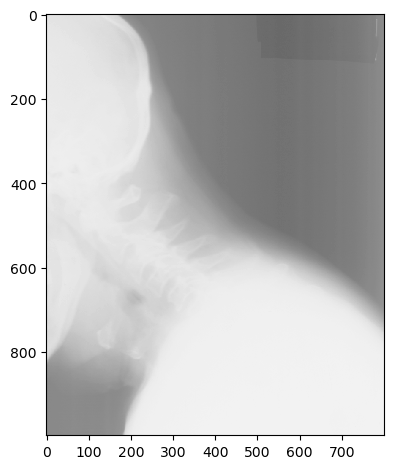

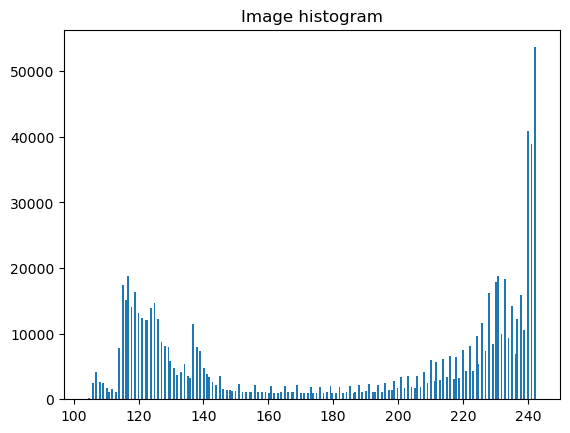

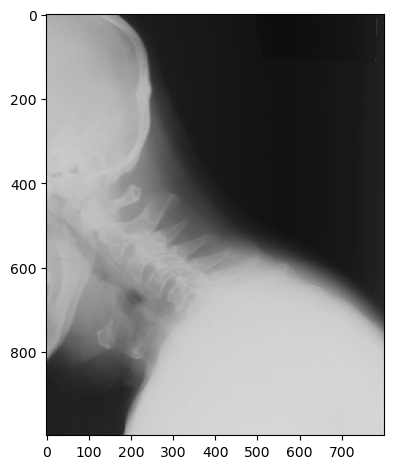

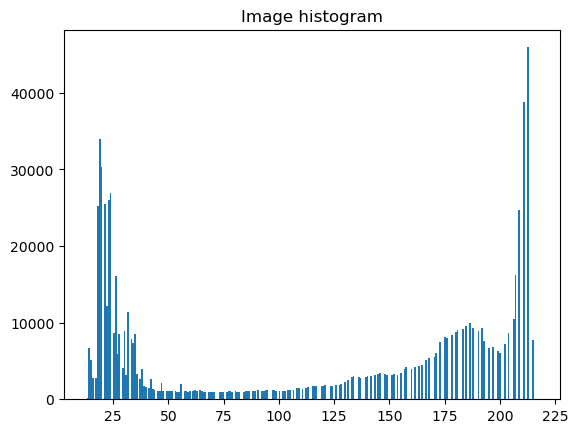

In [23]:
#Try gamma func
gamma_img= gamma_map(im_org,.6)
#show img
io.imshow(gamma_img)
io.show()
#histogram
h=plt.hist(gamma_img.ravel(), bins=256)
plt.title('Image histogram')
io.show()
#Try gamma func
gamma_img= gamma_map(im_org,2)
#show img
io.imshow(gamma_img)
io.show()
#histogram
h=plt.hist(gamma_img.ravel(), bins=256)
plt.title('Image histogram')
io.show()

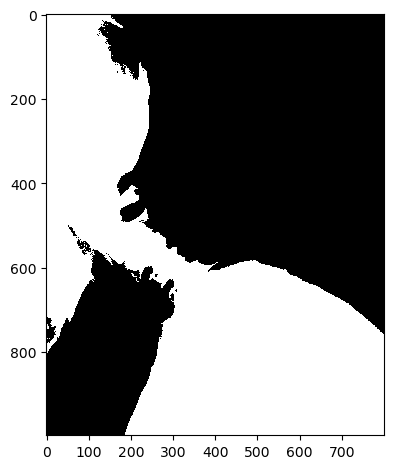

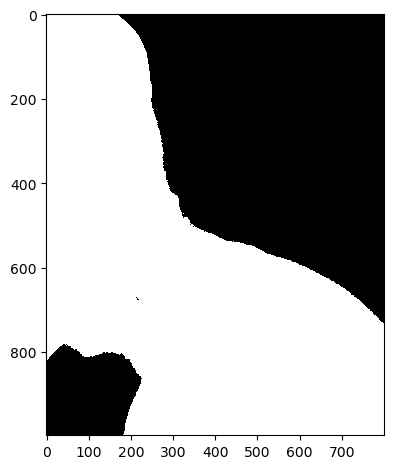

In [30]:
#test threshold
thresh_img= threshold_image(im_org,200)
#show img
io.imshow(thresh_img)
io.show()

#otsu threshold
from skimage.filters import threshold_otsu
thresh_otsu = threshold_otsu(im_org)
thresh_otsu_img= threshold_image(im_org,thresh_otsu)
#show img
io.imshow(thresh_otsu_img)
io.show()


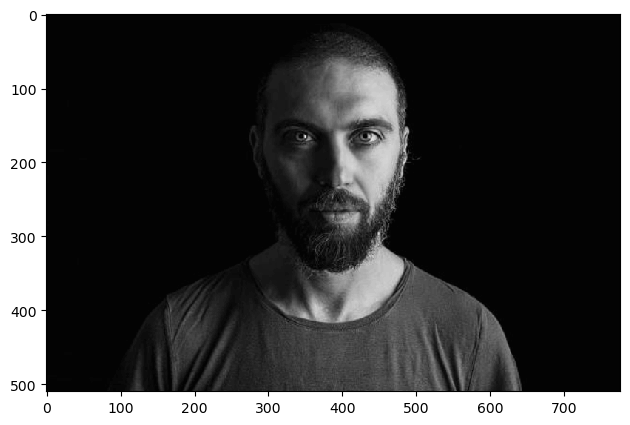

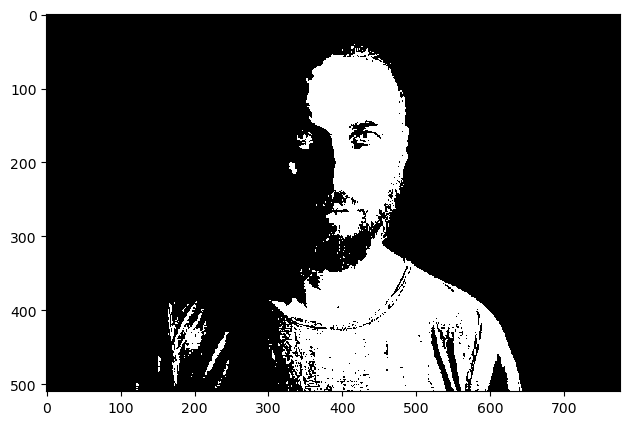

In [33]:
#try otsu with dark backgroumg img
im_name = "dark_background.png"
im_color = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_color)
im_org = img_as_ubyte(im_gray)
#show img
io.imshow(im_org)
io.show()
#otsu threshold
thresh_otsu = threshold_otsu(im_org)
thresh_otsu_img= threshold_image(im_org,thresh_otsu)
#show img
io.imshow(thresh_otsu_img)
io.show()

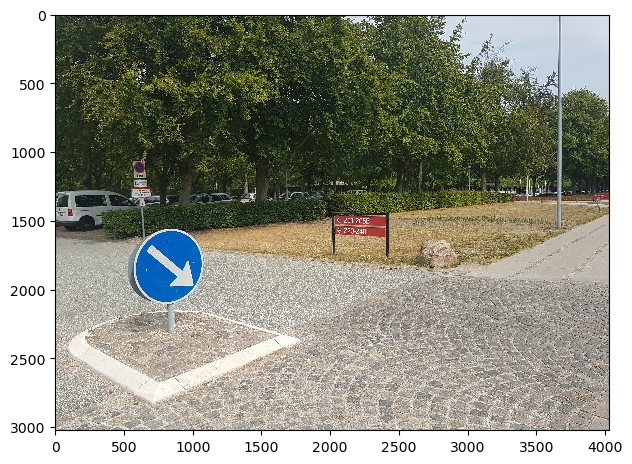

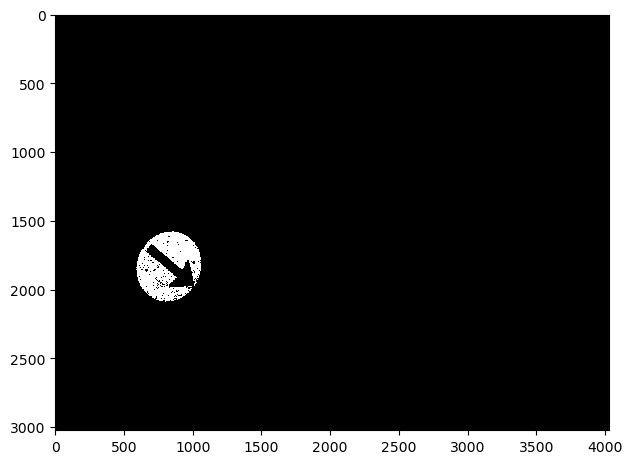

In [39]:
#sign identification:))
im_name = "DTUSigns2.jpg"
im_org = io.imread(in_dir + im_name)
#show img
io.imshow(im_org)
io.show()
#filter and show
img_blue = sign_threshold(im_org)
io.imshow(img_blue)
io.show()

